In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories of Gender: ",df['gender'].unique())
print("Categories of race_ethnicity: ",df['race_ethnicity'].unique())
print("Categories of parental_level_of_education: ",df['parental_level_of_education'].unique())
print("Categories of lunch: ",df['lunch'].unique())
print("Categories of test_preparation_course: ",df['test_preparation_course'].unique())



Categories of Gender:  ['female' 'male']
Categories of race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch:  ['standard' 'free/reduced']
Categories of test_preparation_course:  ['none' 'completed']


In [11]:
for cat in df:
    if df[cat].dtype=='O':
        print(f"Categories of {cat}:",df[cat].unique())

Categories of gender: ['female' 'male']
Categories of race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of lunch: ['standard' 'free/reduced']
Categories of test_preparation_course: ['none' 'completed']


In [12]:
categorical_feature=[feature for feature in df if df[feature].dtype=='O']
numerical_feature=[feature for feature in df if df[feature].dtype!='O']
print("The {} categorical features are: {}".format(len(categorical_feature),(categorical_feature)))
print("The {} numerical features are: {}".format(len(numerical_feature),(numerical_feature)))

The 5 categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
The 3 numerical features are: ['math_score', 'reading_score', 'writing_score']


In [13]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
print((df['math_score'] == 100).sum())

7


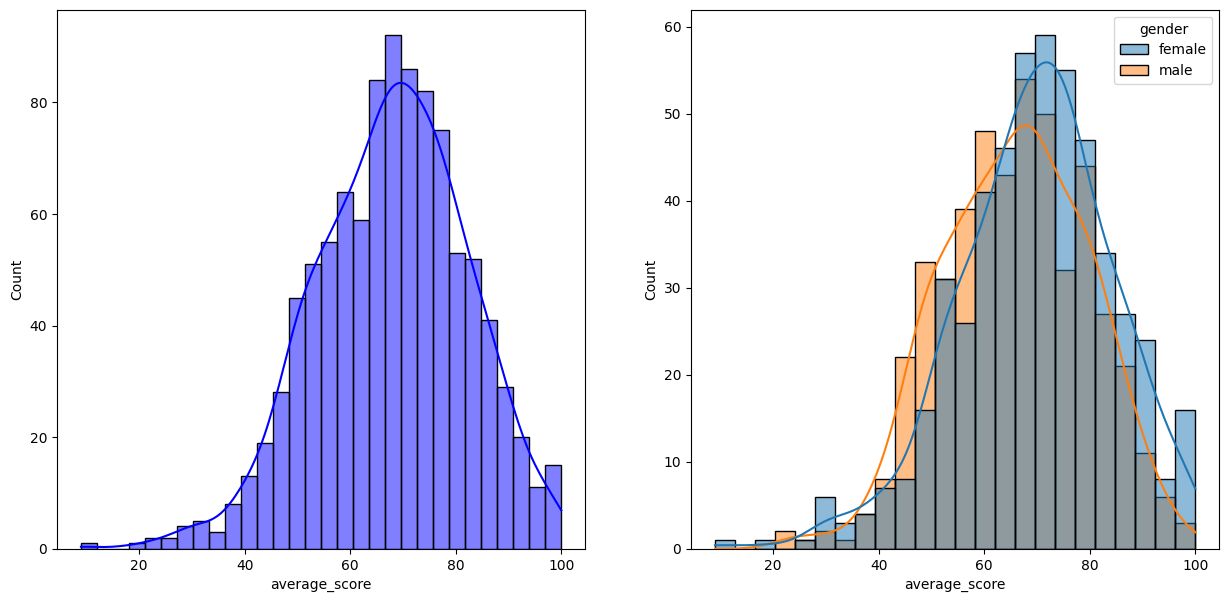

In [15]:
#histogram
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score', bins=30,kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

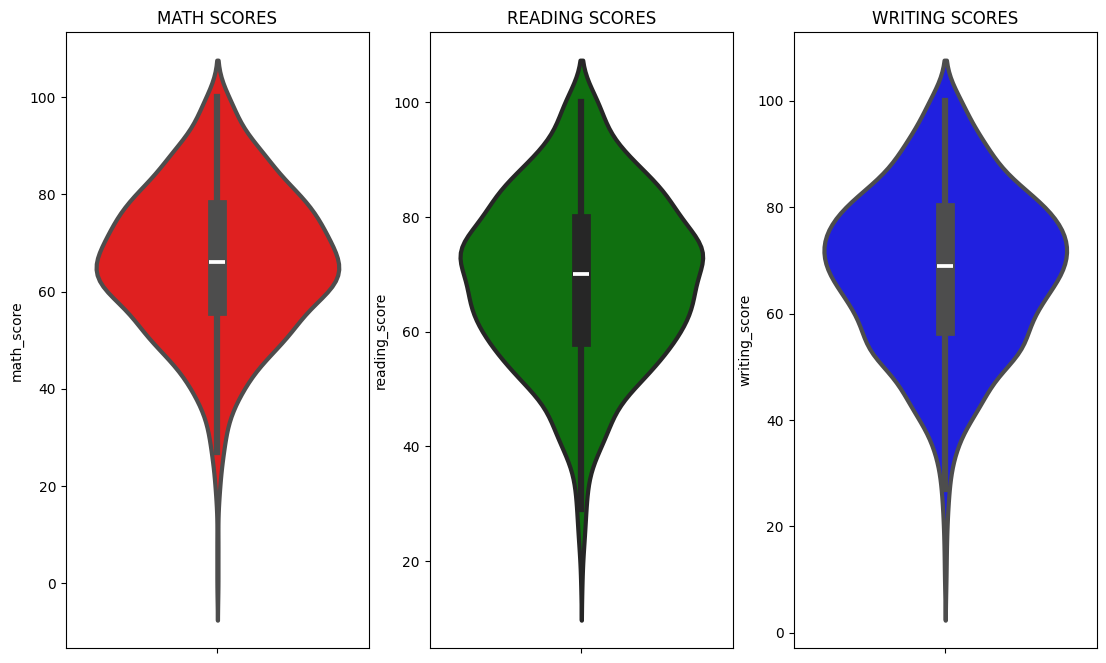

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

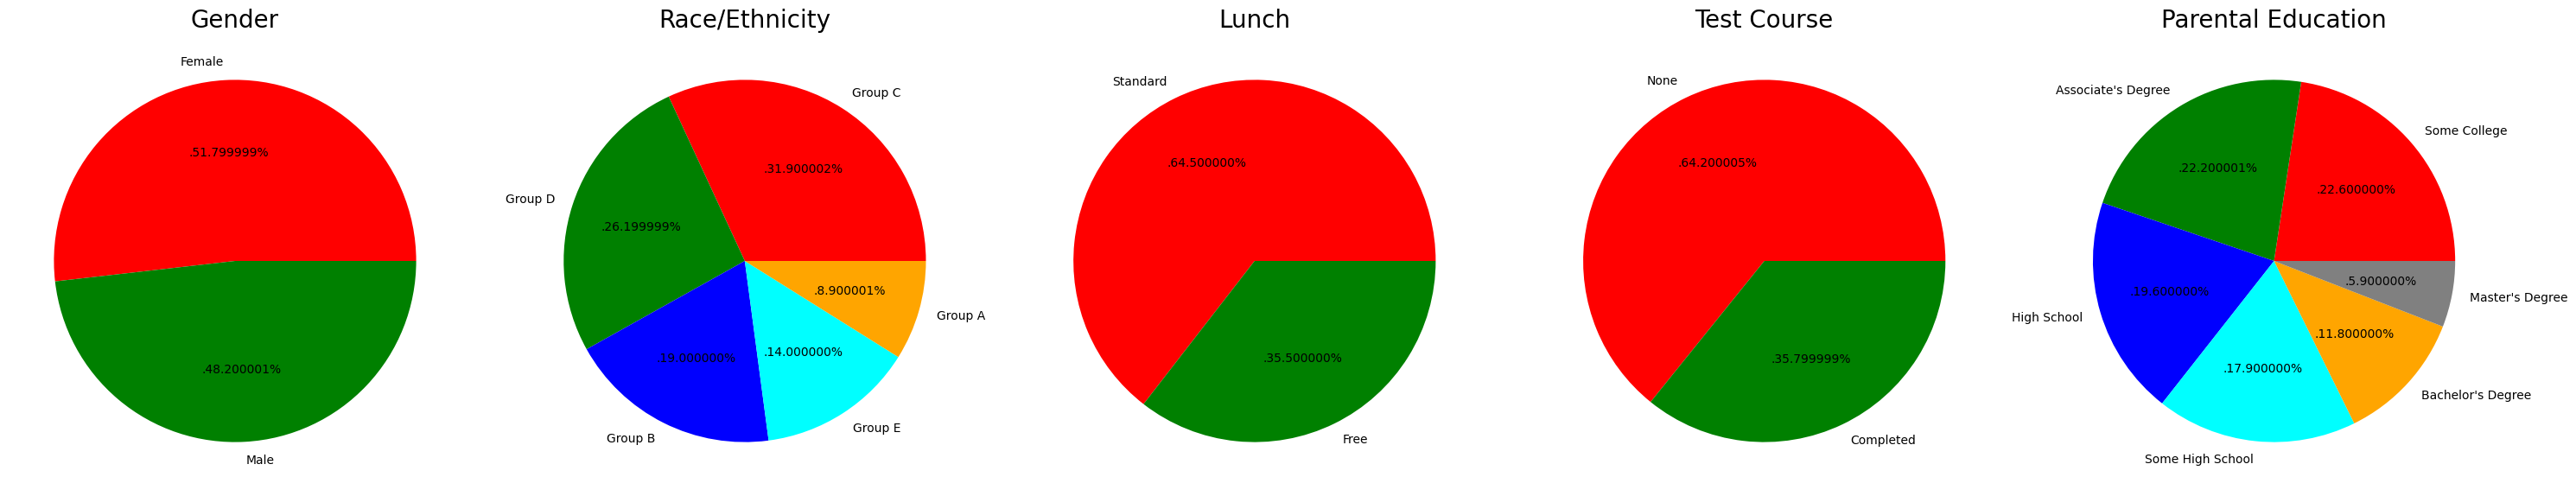

In [18]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



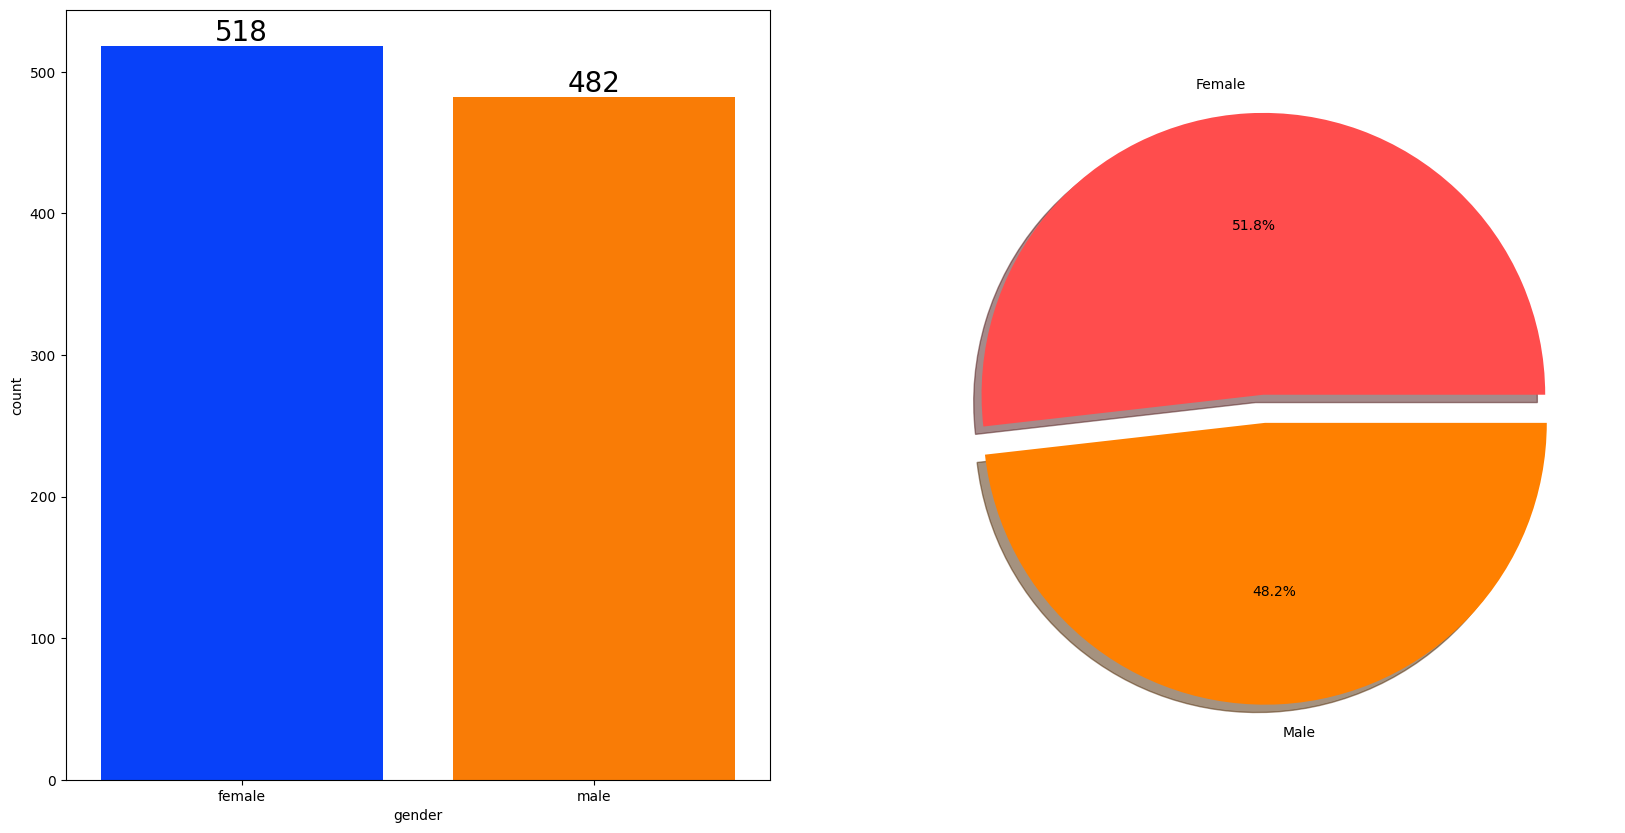

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [25]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


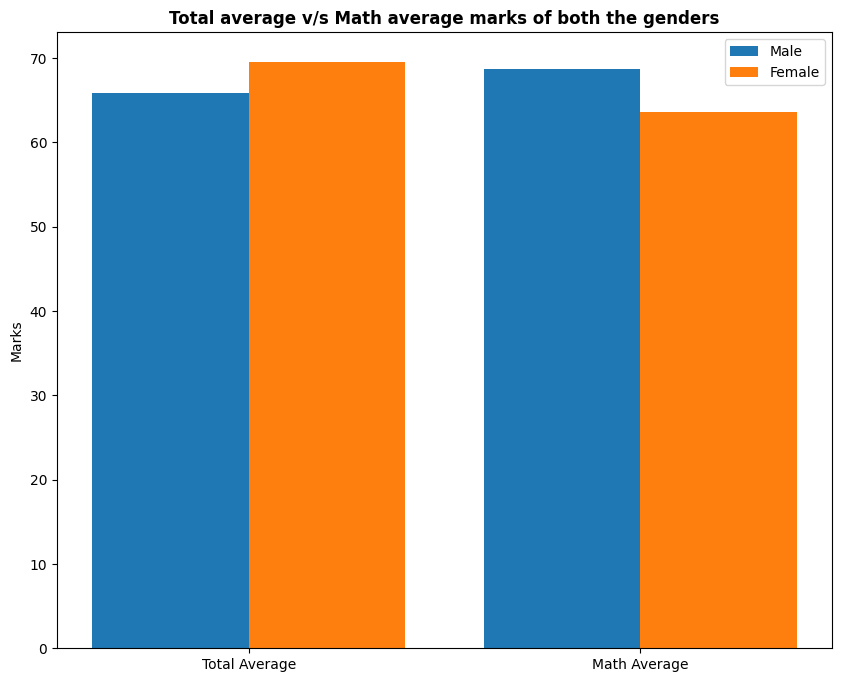

In [28]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


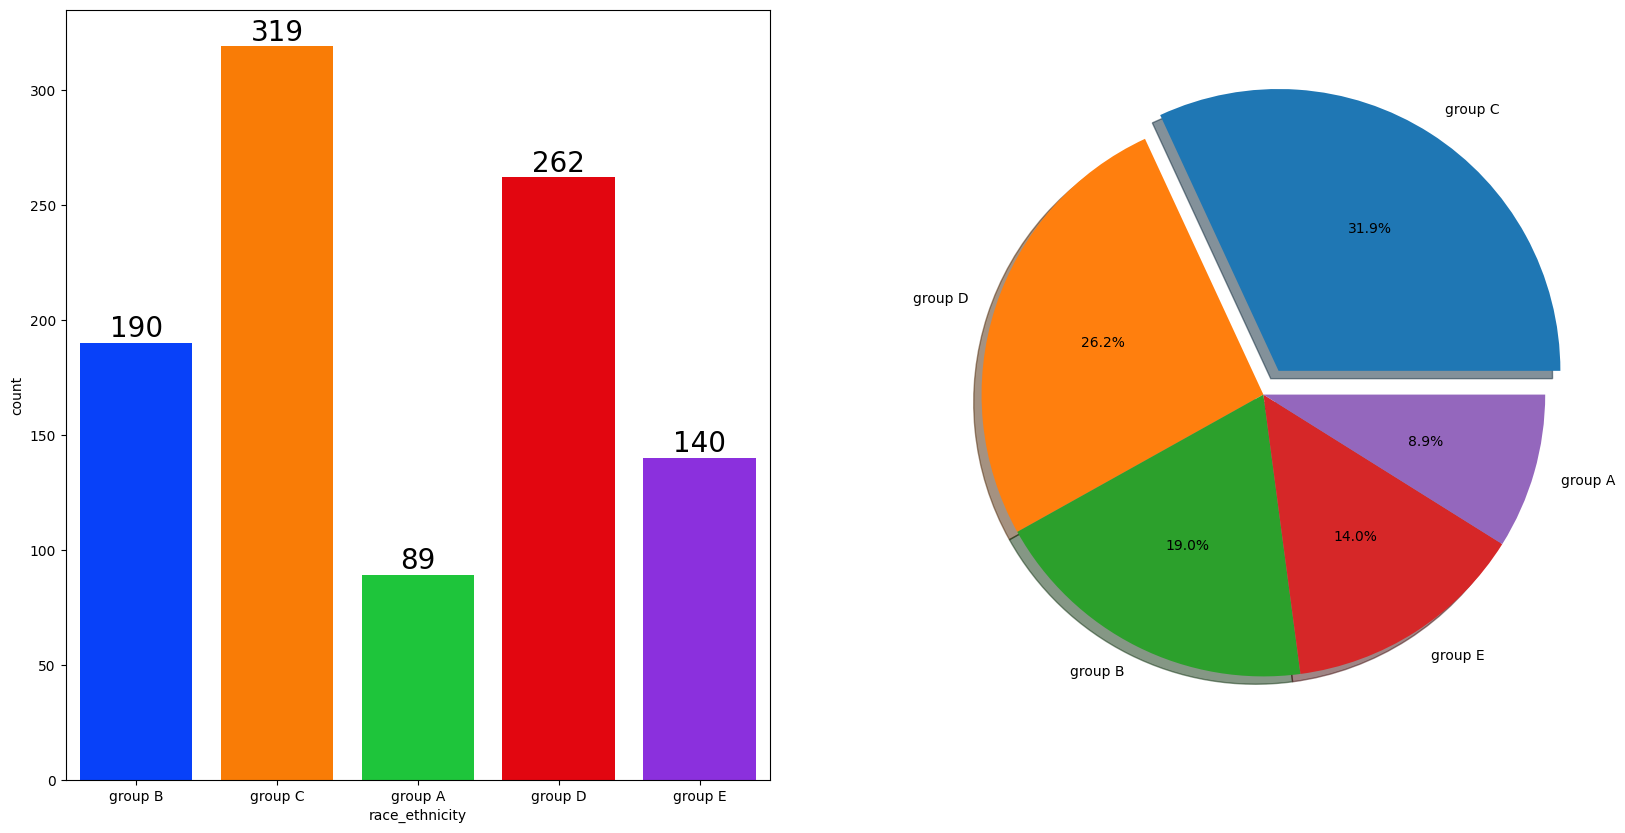

In [32]:
f,ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df, palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%',shadow=True )
plt.show()

In [ ]:
race_date = df.groupby('race_ethnicity')


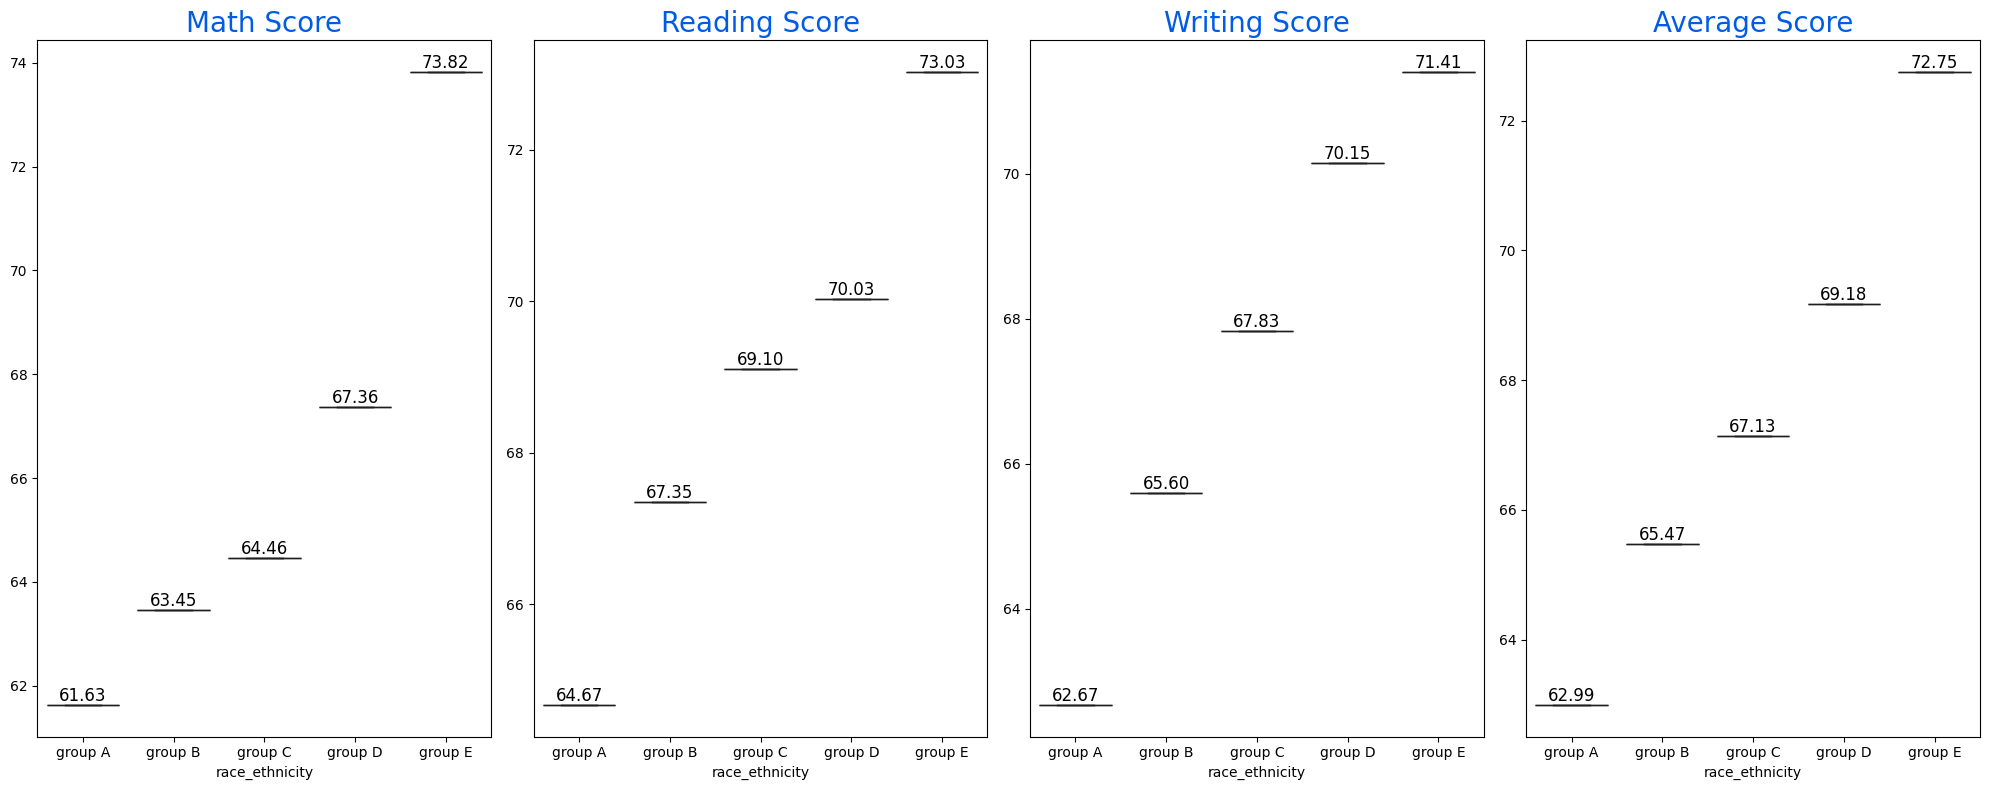

In [41]:
f, ax = plt.subplots(1, 4, figsize=(20, 8))

# Math Score
math_scores = race_date['math_score'].mean()
sns.boxplot(x=math_scores.index, y=math_scores.values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for i, value in enumerate(math_scores.values):
    ax[0].text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', size=12)

# Reading Score
reading_scores = race_date['reading_score'].mean()
sns.boxplot(x=reading_scores.index, y=reading_scores.values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for i, value in enumerate(reading_scores.values):
    ax[1].text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', size=12)

# Writing Score
writing_scores = race_date['writing_score'].mean()
sns.boxplot(x=writing_scores.index, y=writing_scores.values, palette='mako', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for i, value in enumerate(writing_scores.values):
    ax[2].text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', size=12)

# Average Score
average_scores = race_date['average_score'].mean()
sns.boxplot(x=average_scores.index, y=average_scores.values, palette='mako', ax=ax[3])
ax[3].set_title('Average Score', color='#005ce6', size=20)
for i, value in enumerate(average_scores.values):
    ax[3].text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black', size=12)

plt.tight_layout()
plt.show()

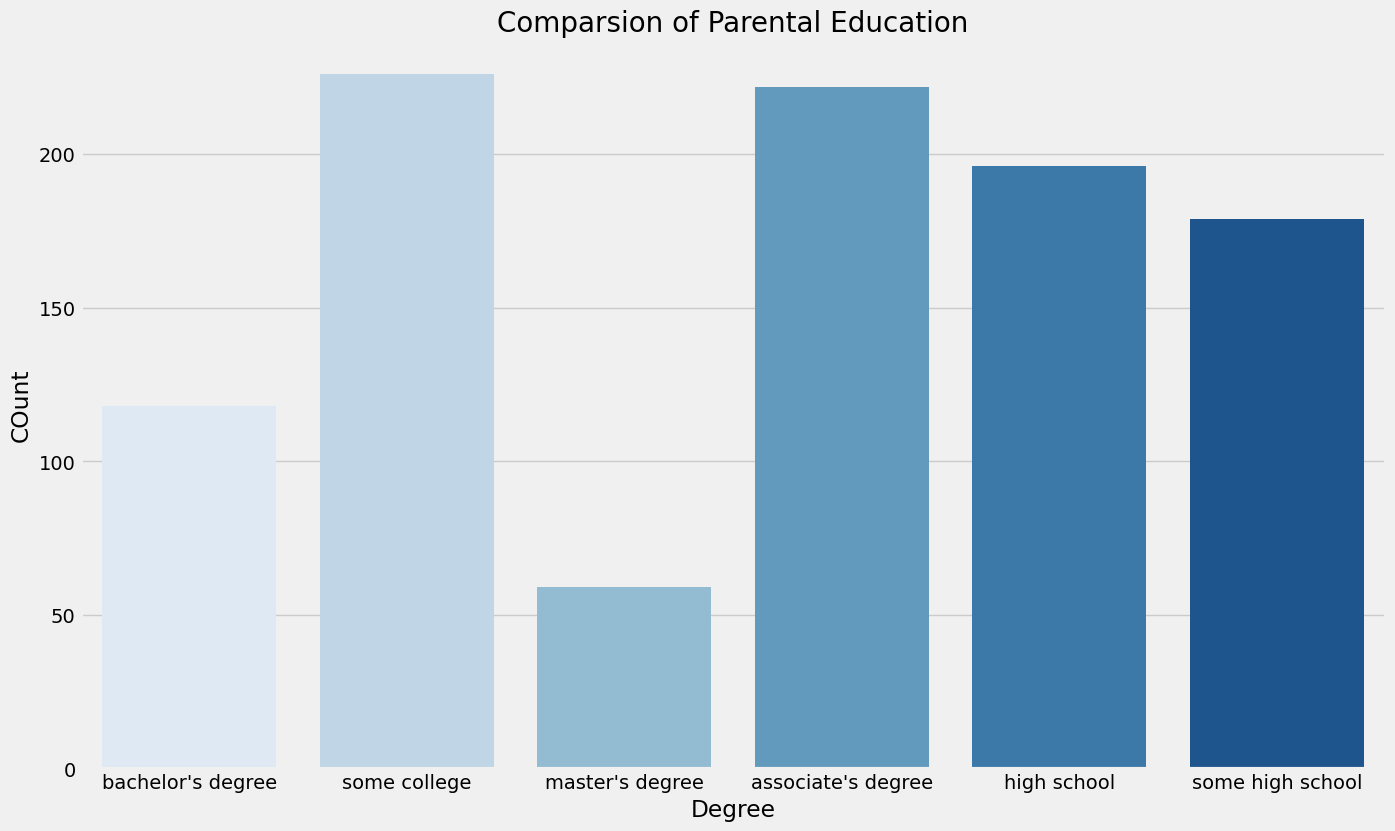

In [46]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], palette='Blues')
plt.title('Comparsion of Parental Education', fontweight = 30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('COunt')
plt.show()

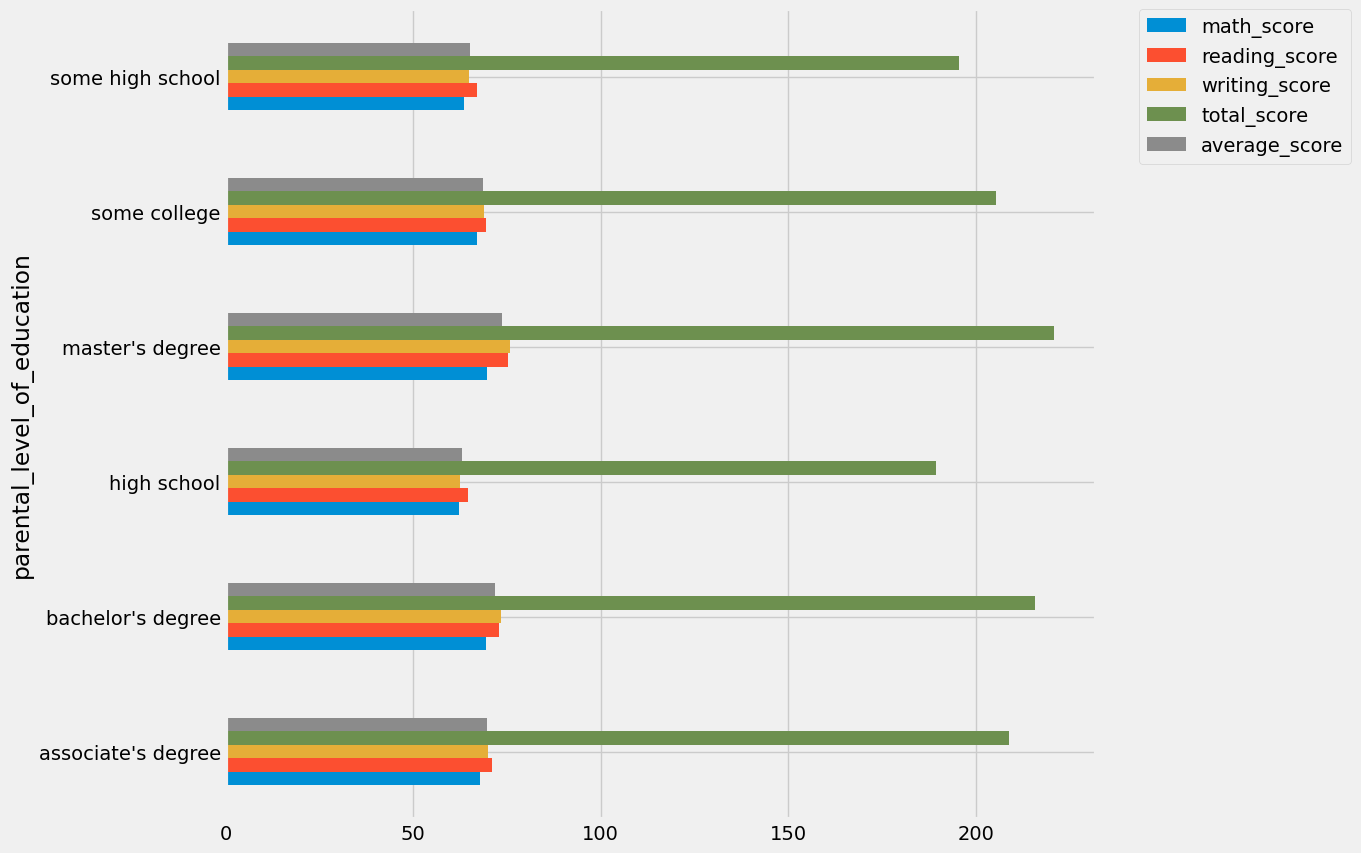

In [48]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

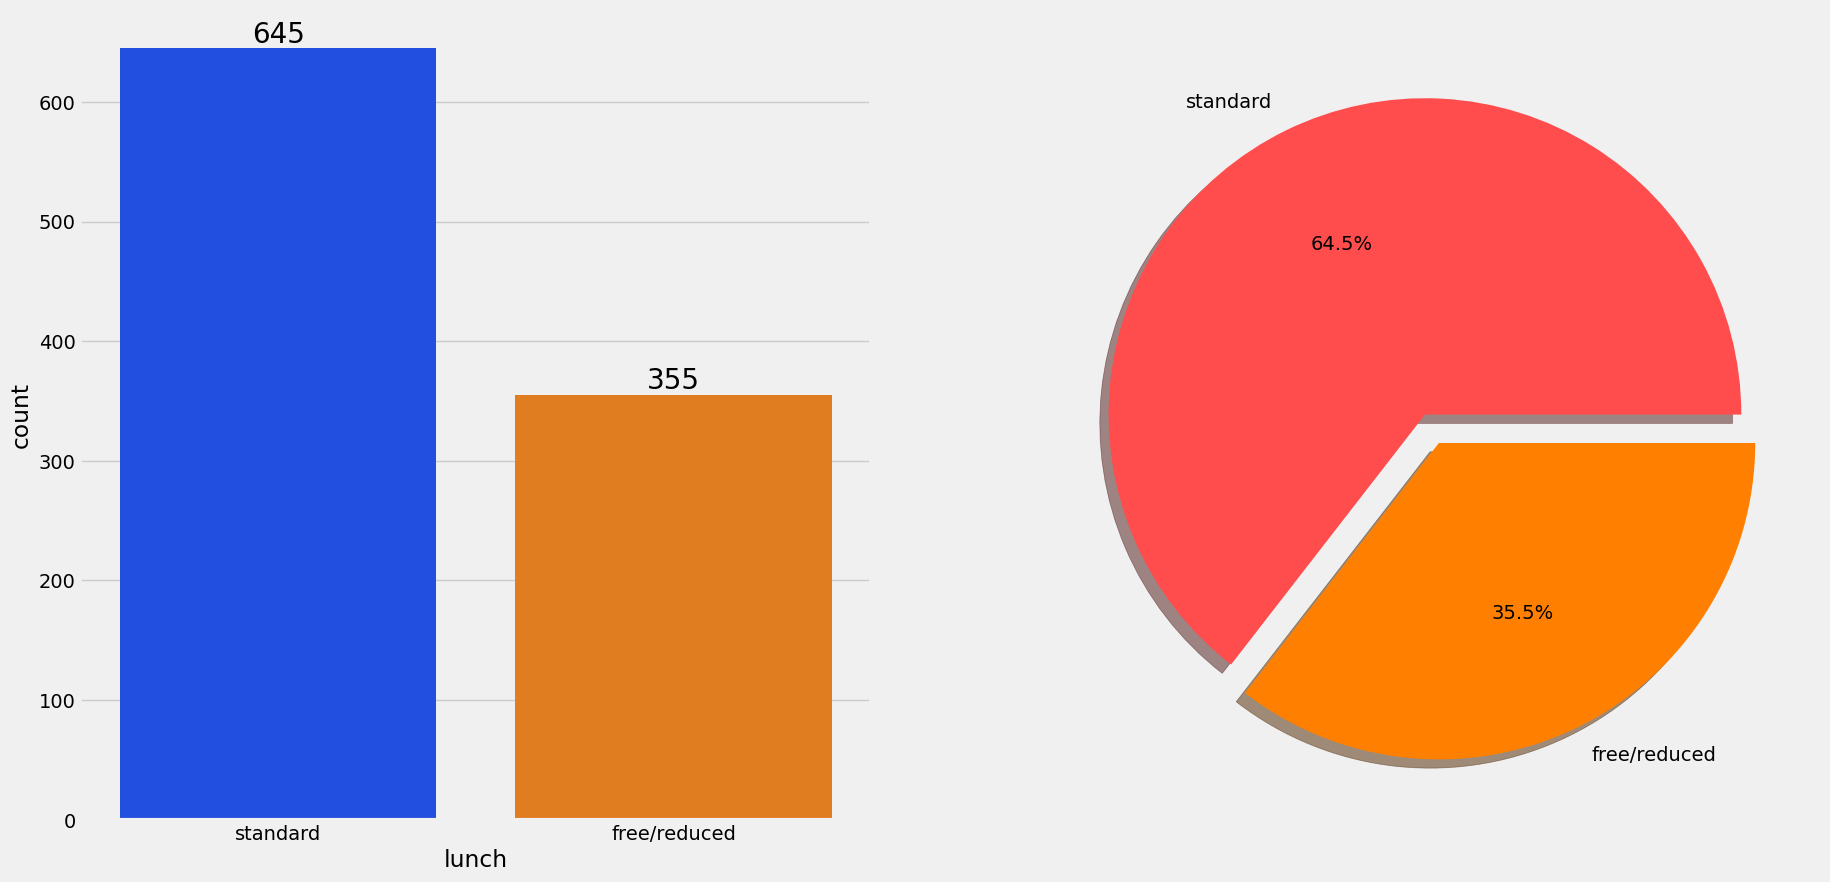

In [60]:


f,ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['lunch'], data=df, palette='bright', ax=ax[0] )
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)
plt.pie(x=df['lunch'].value_counts(), labels=df['lunch'].value_counts().index, explode=[0, 0.1], autopct='%1.1F%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

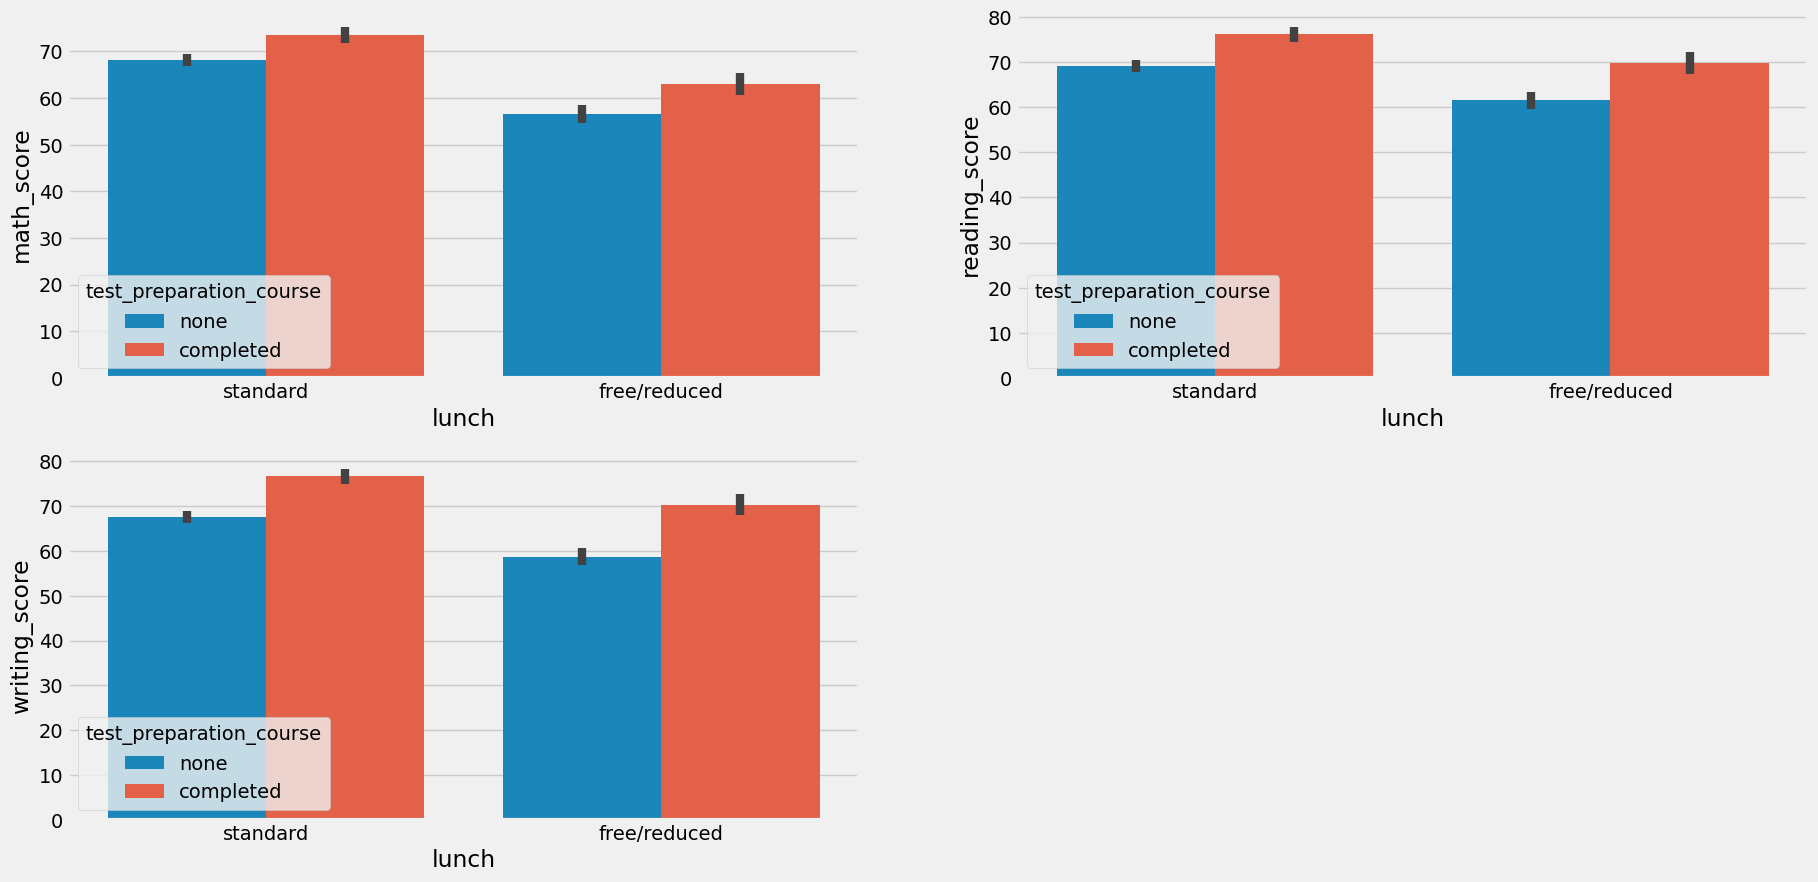

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])


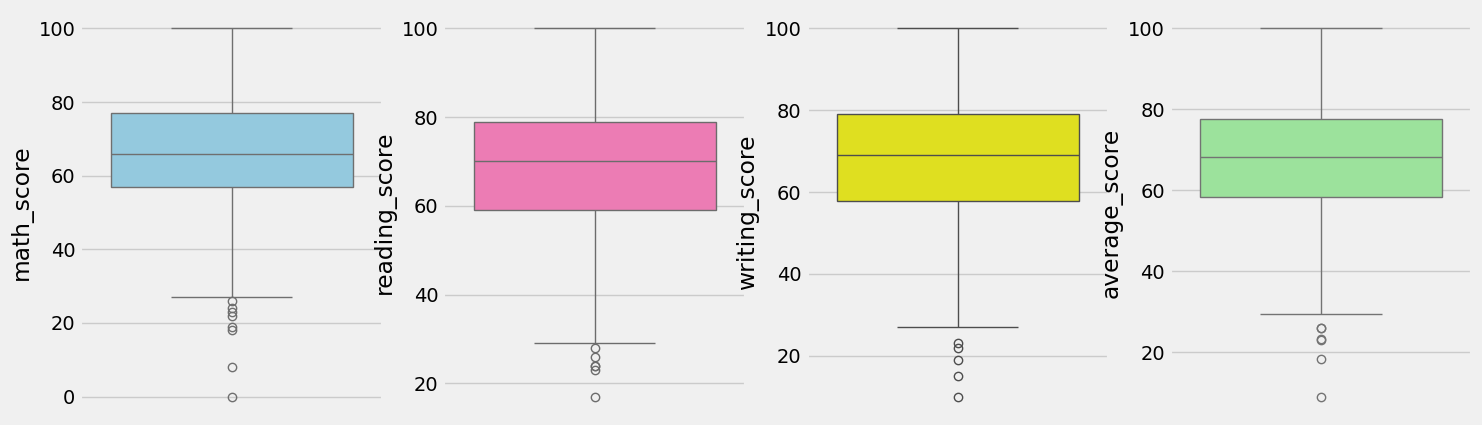

In [65]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

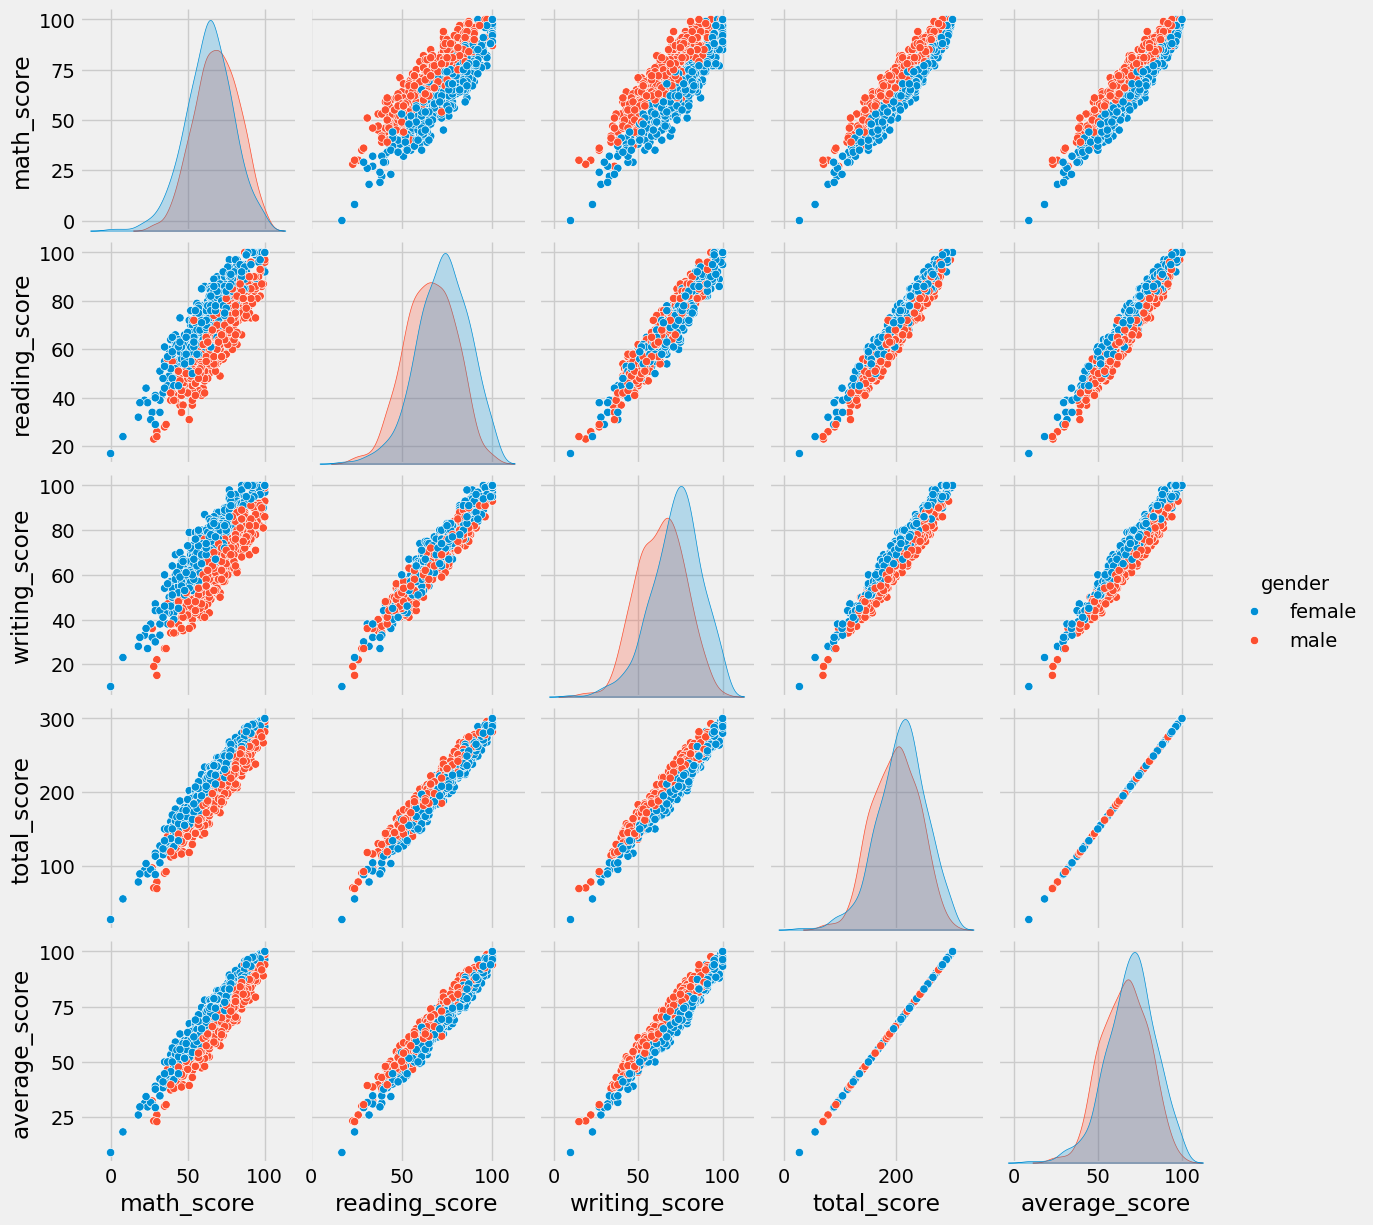

In [66]:
sns.pairplot(df,hue = 'gender')
plt.show()